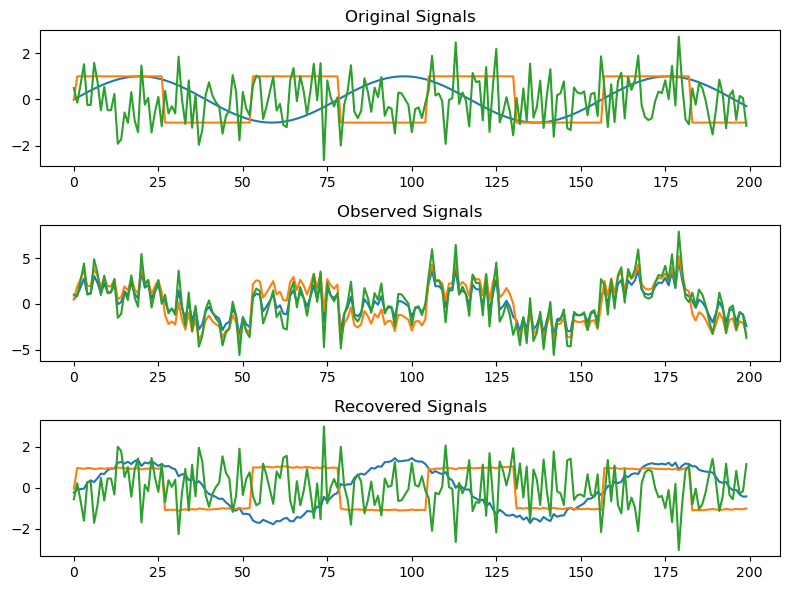

In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Create a synthetic dataset with 3 independent components
np.random.seed(42)

# Number of samples
n_samples = 200
time = np.linspace(0, 8, n_samples)

# Generate signals
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.random.randn(n_samples)

# Stack the signals to create a matrix
S = np.c_[s1, s2, s3]

# Mix the signals to create observed data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = S.dot(A.T)  # Observed data

# Apply ICA to recover the independent components
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Independent components

# Plot the original signals and the recovered signals
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Signals')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Recovered Signals')
plt.plot(S_)

plt.tight_layout()
plt.show()


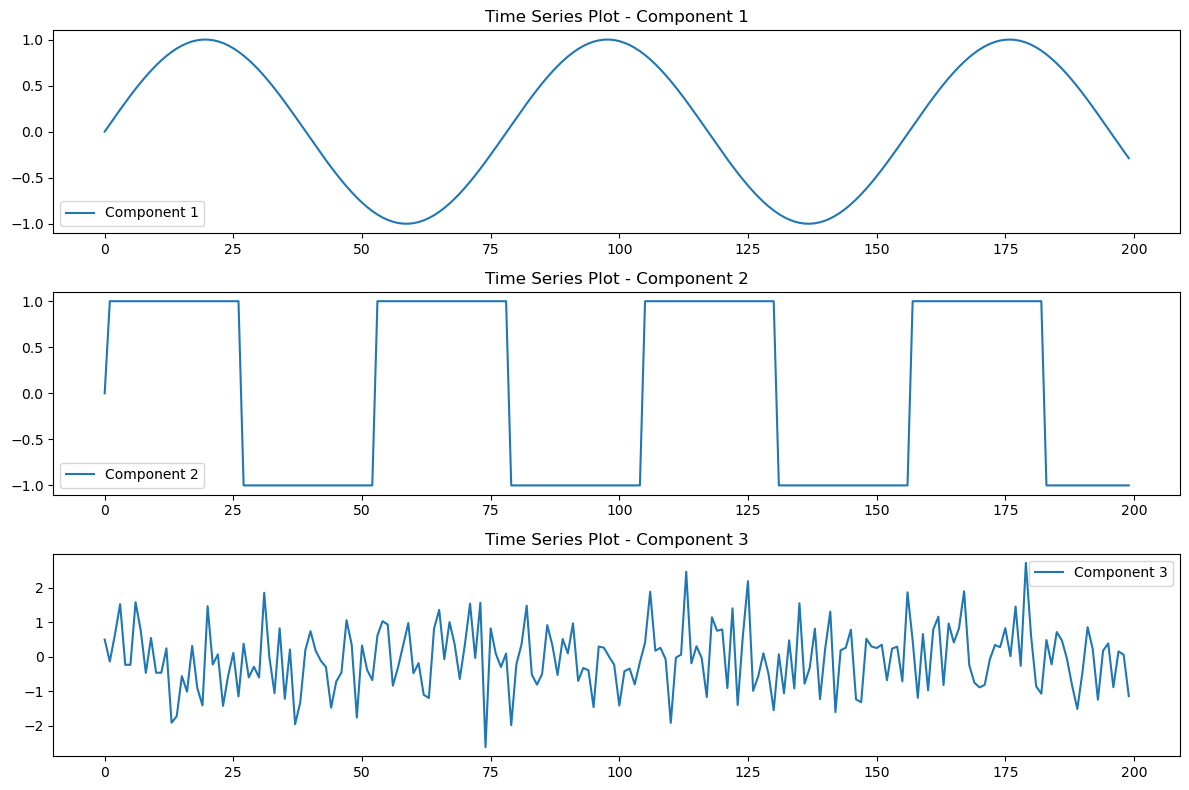

In [2]:
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(S[:, i], label=f'Component {i+1}')
    plt.legend()
    plt.title(f'Time Series Plot - Component {i+1}')
plt.tight_layout()
plt.show()


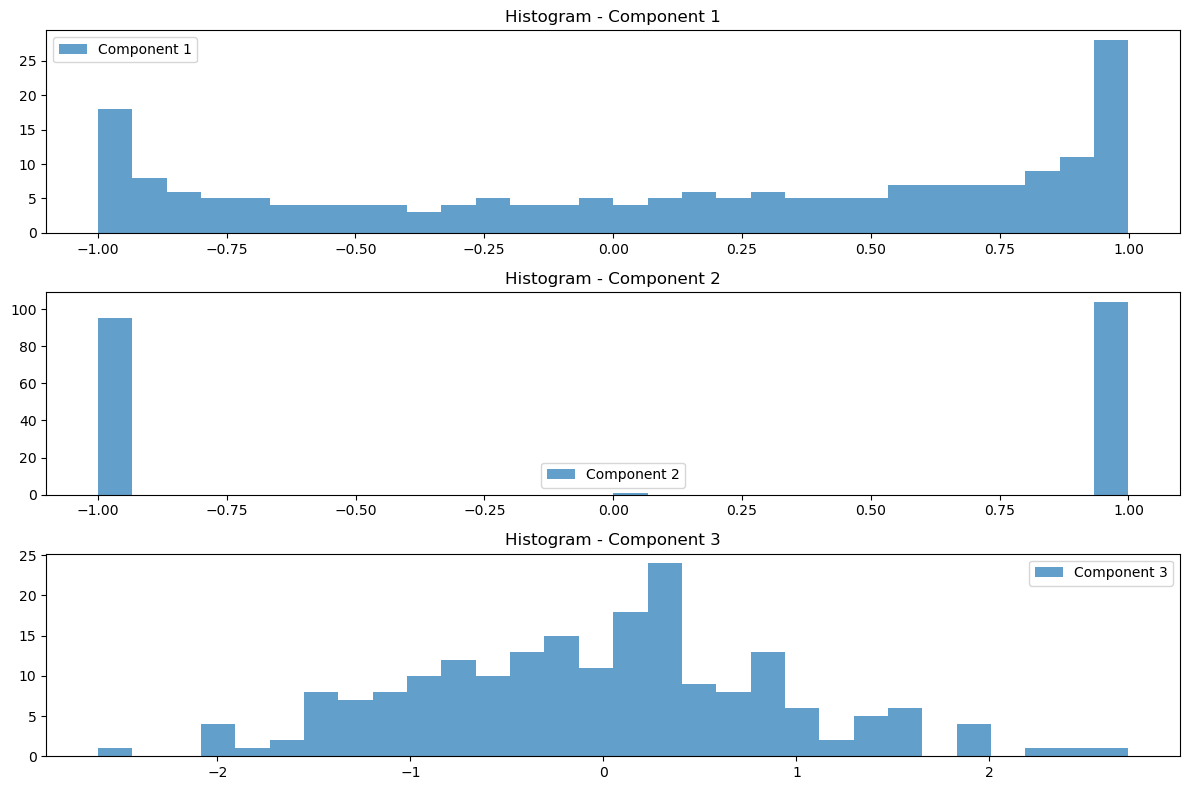

In [3]:
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.hist(S[:, i], bins=30, alpha=0.7, label=f'Component {i+1}')
    plt.legend()
    plt.title(f'Histogram - Component {i+1}')
plt.tight_layout()
plt.show()


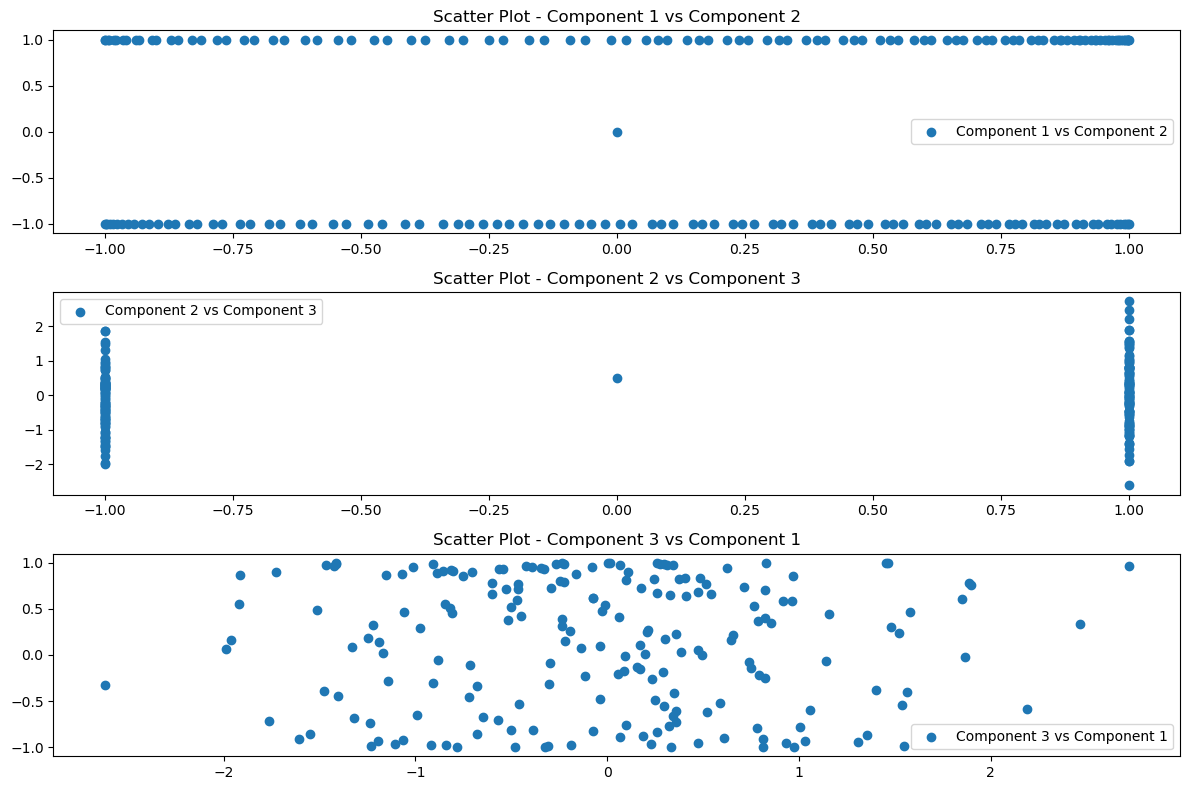

In [4]:
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.scatter(S[:, i], S[:, (i+1) % 3], label=f'Component {i+1} vs Component {(i+1) % 3 + 1}')
    plt.legend()
    plt.title(f'Scatter Plot - Component {i+1} vs Component {(i+1) % 3 + 1}')
plt.tight_layout()
plt.show()


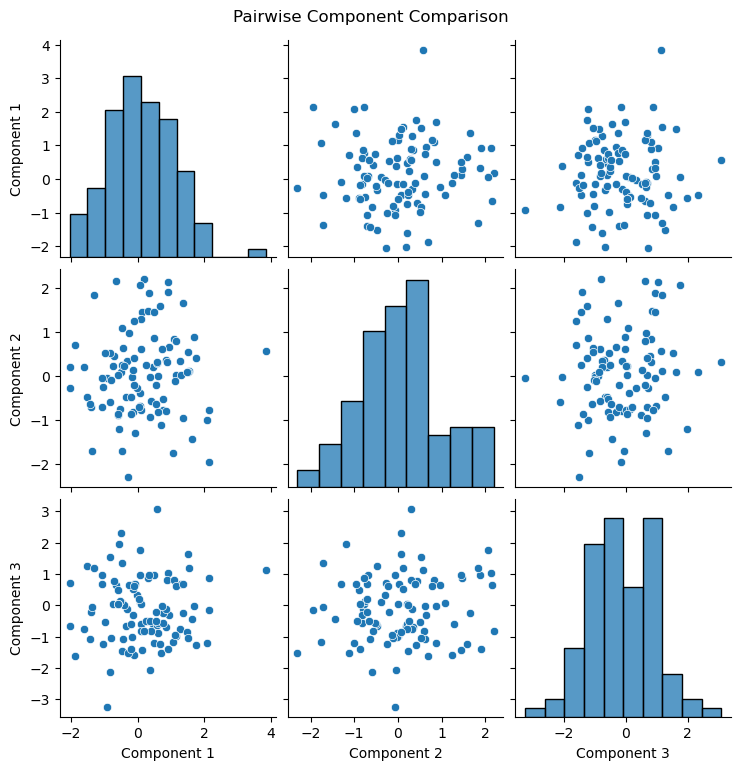

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Assuming S contains your independent components
# Replace S with the actual variable containing your independent components

# Example data (replace this with your actual independent components)
S = np.random.randn(100, 3)

# Suppress FutureWarning related to use_inf_as_na
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Pairwise component comparison using seaborn pairplot
    sns.pairplot(pd.DataFrame(S, columns=['Component 1', 'Component 2', 'Component 3']))

plt.suptitle('Pairwise Component Comparison', y=1.02)
plt.show()


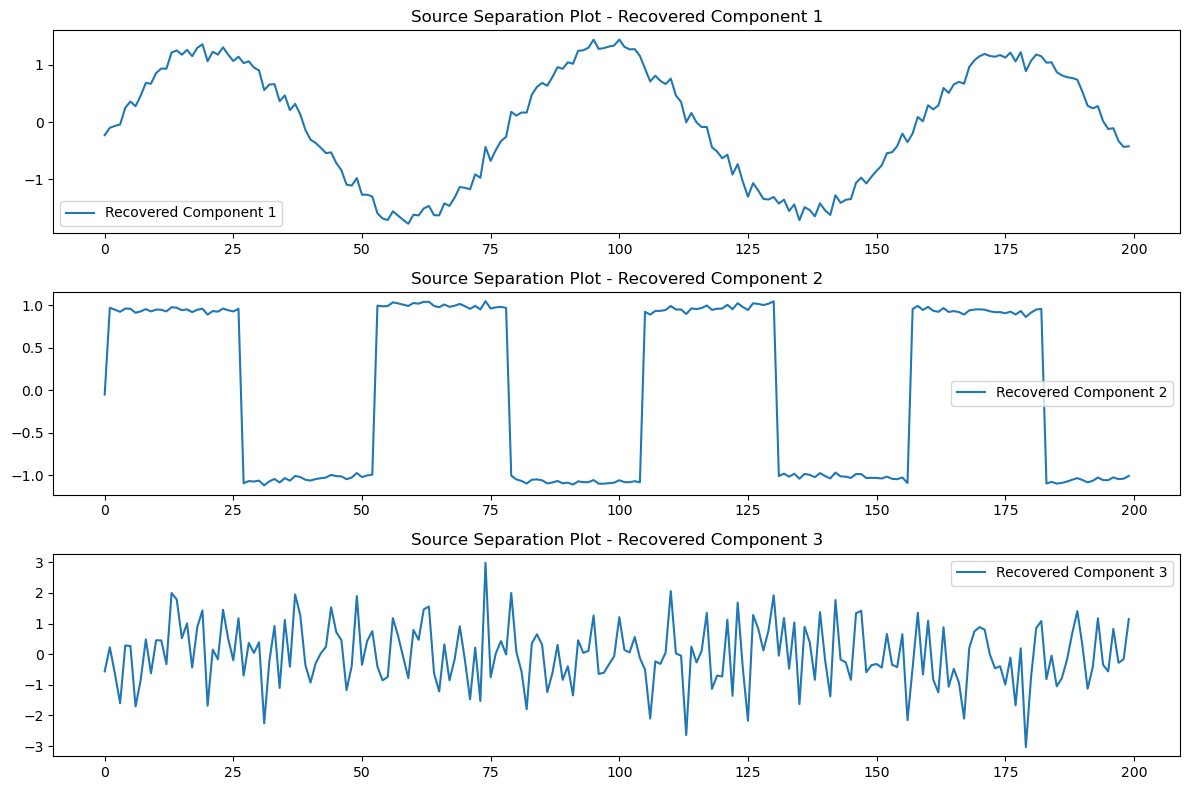

In [10]:
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(S_[:, i], label=f'Recovered Component {i+1}')
    plt.legend()
    plt.title(f'Source Separation Plot - Recovered Component {i+1}')
plt.tight_layout()
plt.show()


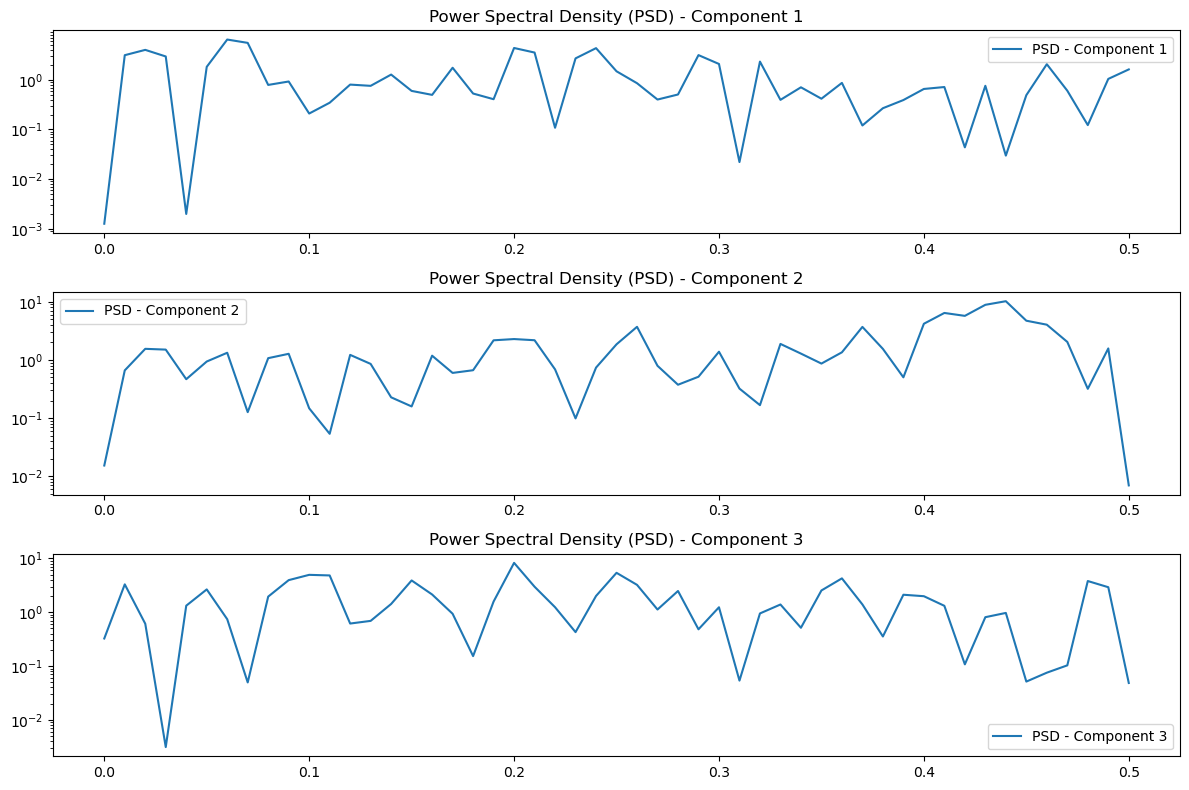

In [13]:
from scipy.signal import welch

plt.figure(figsize=(12, 8))
for i in range(3):
    f, Pxx = welch(S[:, i], nperseg=min(256, len(S)))
    plt.subplot(3, 1, i+1)
    plt.semilogy(f, Pxx, label=f'PSD - Component {i+1}')
    plt.legend()
    plt.title(f'Power Spectral Density (PSD) - Component {i+1}')
plt.tight_layout()
plt.show()


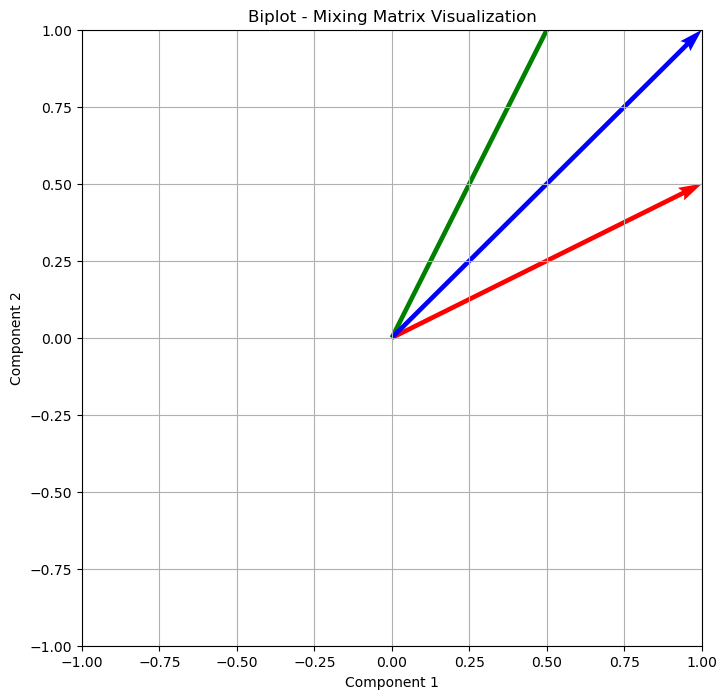

In [14]:
plt.figure(figsize=(8, 8))
plt.title('Biplot - Mixing Matrix Visualization')
plt.quiver([0, 0, 0], [0, 0, 0], A[0, :], A[1, :], angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()


In [15]:
from scipy.stats import kurtosis

kurt_values = kurtosis(S, axis=0)
for i, kurt in enumerate(kurt_values):
    print(f'Kurtosis for Component {i+1}: {kurt}')


Kurtosis for Component 1: 0.6321190323344328
Kurtosis for Component 2: -0.13732913669735503
Kurtosis for Component 3: 0.2940410807095568


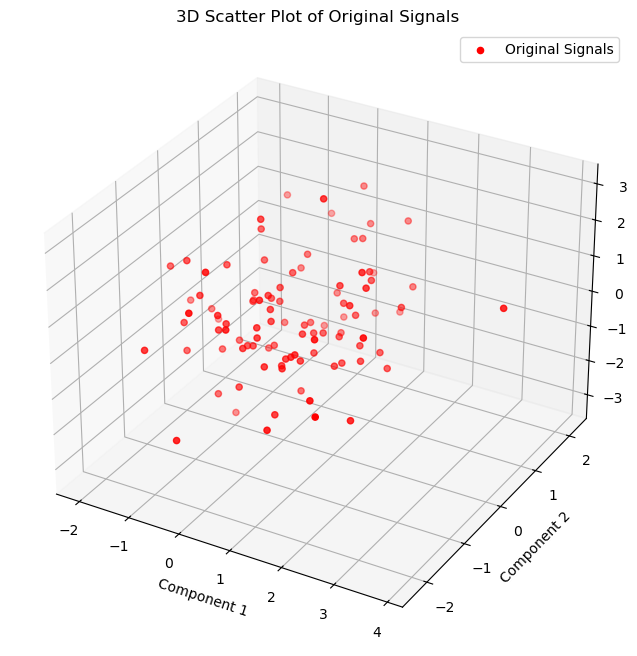

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(S[:, 0], S[:, 1], S[:, 2], c='r', marker='o', label='Original Signals')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.title('3D Scatter Plot of Original Signals')
plt.show()
